Begin by setting up environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import data:

In [2]:
df = pd.read_csv('/Users/chichi/Desktop/python/challenge_3/medical_examination.csv')

Add an overweight column, first calculating BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight

In [3]:
BMI = df['weight'] / ((df['height']/100)**2)
df['overweight']=np.where(BMI>25,1,0)
 

Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1

In [4]:
df['cholesterol']=np.where(df['cholesterol']==1,0,1)
df['gluc']=np.where(df['gluc']==1,0,1)

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value

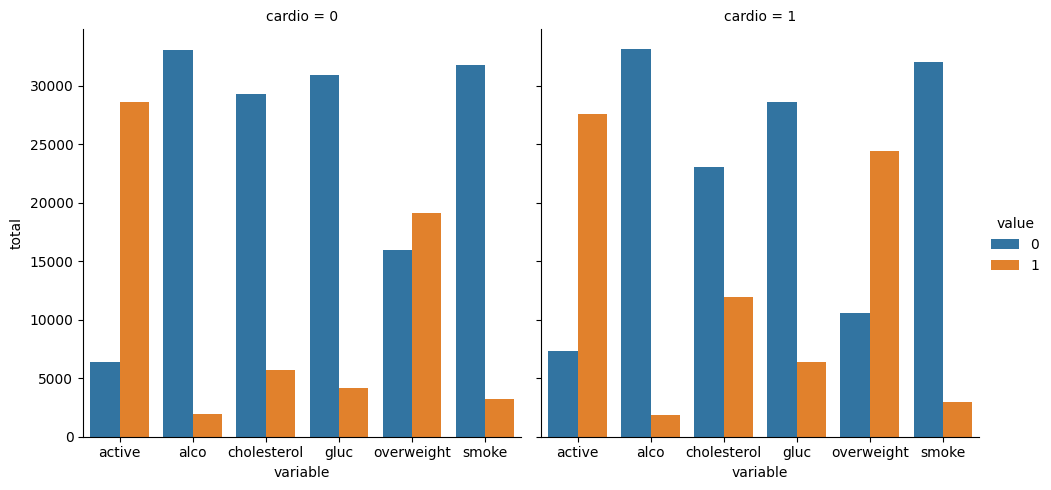

In [5]:
df_cat = pd.melt(df,id_vars = (['cardio']), value_vars = ['cholesterol', 'gluc', 'alco', 'active', 'smoke', 'overweight'])
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
df_cat
sns.catplot(data=df_cat, x="variable", y="total", hue="value", col="cardio", kind="bar", order=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])

Get the figure for the output and store it in the fig variable

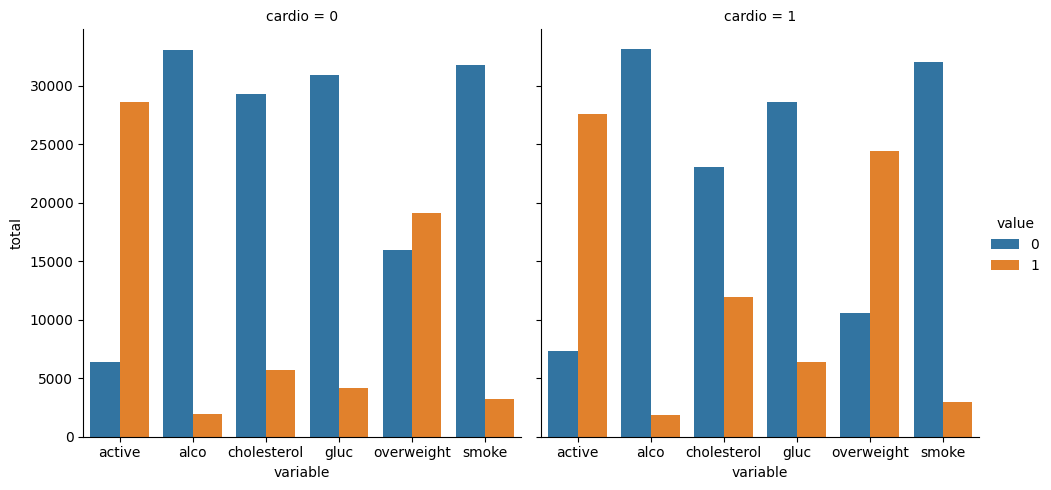

In [6]:
fig = sns.catplot(data=df_cat, x="variable", y="total", hue="value", col="cardio", kind="bar", order=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"]).figure

Draw the Heat Map in the draw_heat_map function.
Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [7]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= df['height'].quantile(0.025)) & 
    (df['height'] <= df['height'].quantile(0.975)) & 
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

Calculate the correlation matrix and store it in the corr variable

In [8]:
corr = df_heat.corr()

Generate a mask for the upper triangle and store it in the mask variable

In [9]:
mask = np.triu(corr)

Set up the matplotlib figure

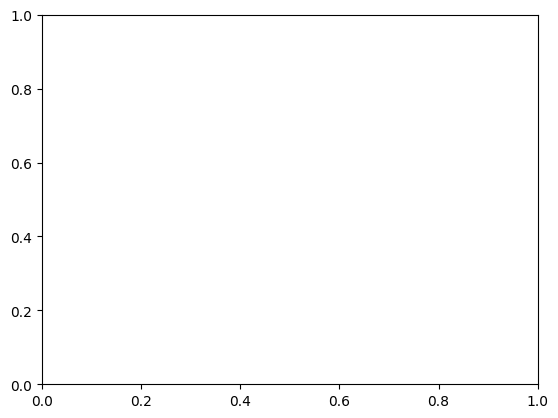

In [10]:
fig, ax = plt.subplots()

Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap()

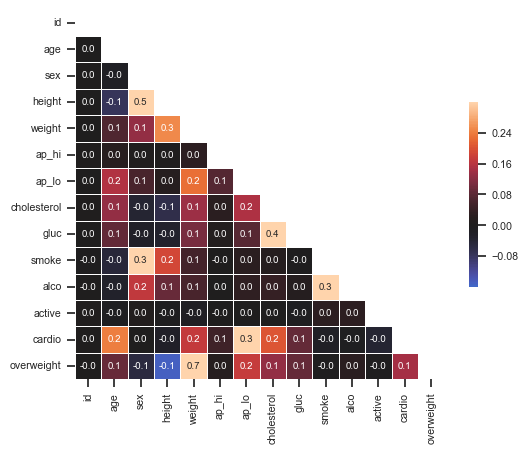

In [37]:
sns.set_theme(font_scale=.7,style='white',font='Sans serif')
heatmap = sns.heatmap(corr, mask=mask, xticklabels=True,yticklabels=True, vmax=.32, vmin=-.16,annot=True,fmt=".1f",center=0, square=True, linewidths=.7,annot_kws={'fontsize':7 },cbar_kws={'shrink':.5,'ticks': [0.24,0.16,0.08,0.00,-0.08]})
heatmap.tick_params(left=True, bottom=True)